In [7]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)


In [13]:
df_DA_US = df_clean[(df_clean['job_title_short']=='Data Analyst') & (df_clean['job_country'] == 'United States')]
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,3619
"New York, NY",2140
"Atlanta, GA",1732
"Chicago, IL",1462
"Austin, TX",1244
"Dallas, TX",1174
"Washington, DC",1097
"Charlotte, NC",849
"Los Angeles, CA",838


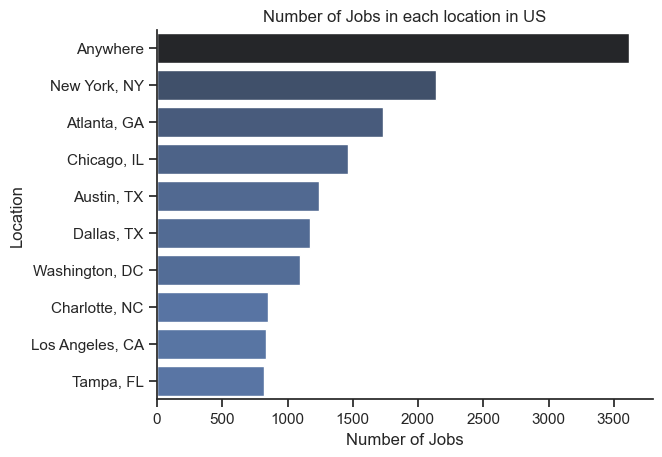

In [22]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Number of Jobs in each location in US")
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

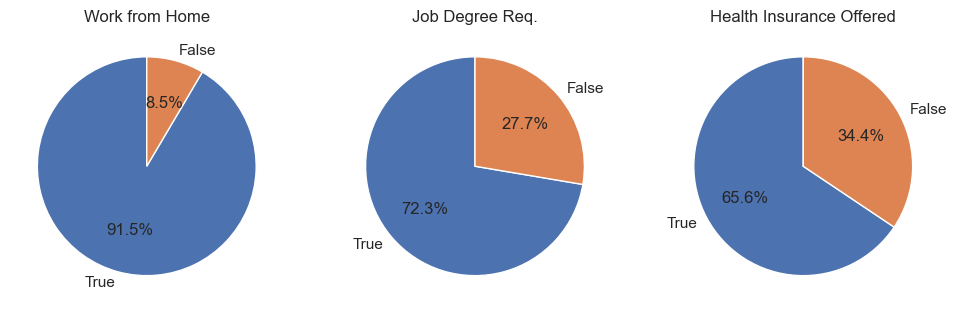

In [24]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_columns = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column, title) in enumerate(dict_columns.items()):
    # print(i, column, title)
    ax[i].pie(df_DA_US[column].value_counts(), autopct='%1.1f%%',labels=['True','False'],startangle=90)
    ax[i].set_title(title)
plt.show()

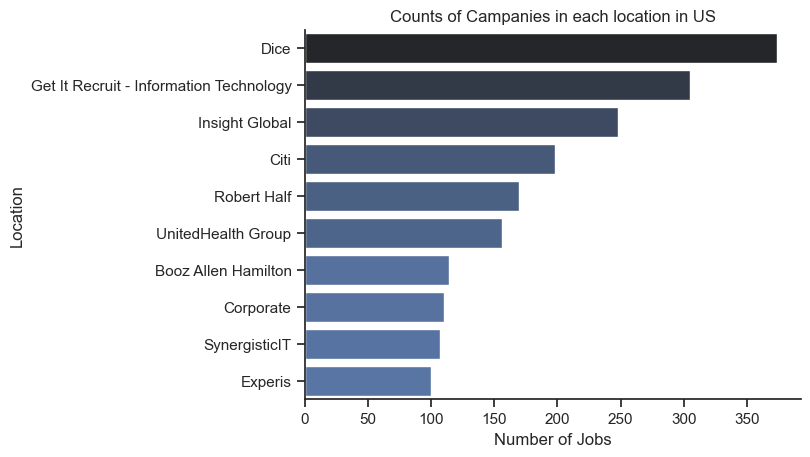

In [25]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Campanies in each location in US")
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()